<a href="https://colab.research.google.com/github/yForecasting/intro_python/blob/main/tutorials/Online_Retail_Sales_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Online Retail Sales Analysis

In [3]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [4]:
# local file: 
data = pd.read_csv("online_retail.csv")
# remote file
#url = 'https://github.com/yForecasting/intro_python/raw/main/datasets/online_retail.csv'
#data  = pd.read_csv(url)

In [5]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [6]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04-12-2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04-12-2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04-12-2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04-12-2011 13:15,2.89,16931.0,United Kingdom
1048574,580502,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,04-12-2011 13:15,6.65,16931.0,United Kingdom


In [7]:
data.shape

(1048575, 8)

In [8]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
data.duplicated().sum()

34150

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(1014425, 8)

In [12]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4265
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228826
Country             0
dtype: int64

In [13]:
data = data.drop('Description', axis = 1)

In [14]:
data.shape

(1014425, 7)

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014425 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1014425 non-null  object        
 1   StockCode    1014425 non-null  object        
 2   Quantity     1014425 non-null  int64         
 3   InvoiceDate  1014425 non-null  datetime64[ns]
 4   Price        1014425 non-null  float64       
 5   Customer ID  785599 non-null   float64       
 6   Country      1014425 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 61.9+ MB


In [17]:
data.describe()

,Quantity,Price,Customer ID
count,1.014425e+06,1.014425e+06,785599.000000
mean,1.009725e+01,4.590115e+00,15313.078667
std,1.352799e+02,1.215813e+02,1695.992802
min,-7.421500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13963.000000
50%,3.000000e+00,2.100000e+00,15235.000000
75%,1.000000e+01,4.150000e+00,16788.000000
max,7.421500e+04,3.897000e+04,18287.000000


In [18]:
data.nunique()

Invoice        52961
StockCode       5304
Quantity        1048
InvoiceDate    47046
Price           2784
Customer ID     5924
Country           43
dtype: int64

In [19]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year

In [20]:
data.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009


In [21]:
sales = data.loc[data['Quantity'] > 0 & ~(data['Invoice'].str.contains('C'))]

In [22]:
sales.shape

(992181, 8)

In [23]:
sales.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009


In [24]:
sales.sample(10)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
386750,526629,22645,4,2010-12-10 12:59:00,1.45,14527.0,United Kingdom,2010
926493,571411,82486,4,2011-10-17 12:33:00,8.95,17858.0,United Kingdom,2011
378833,525919,21217,2,2010-07-10 16:28:00,9.95,13280.0,United Kingdom,2010
620268,544418,21498,4,2011-02-18 15:15:00,0.42,NaN,United Kingdom,2011
382380,526189,21329,1,2010-10-10 12:09:00,1.65,17555.0,United Kingdom,2010
909418,570093,21340,1,2011-07-10 11:55:00,12.75,18096.0,United Kingdom,2011
804265,561218,22144,1,2011-07-25 17:11:00,4.13,NaN,United Kingdom,2011
653648,547250,22457,2,2011-03-22 09:30:00,5.79,NaN,United Kingdom,2011
820946,562789,20719,200,2011-09-08 13:50:00,0.72,14646.0,Netherlands,2011
47419,493812,72800D,12,2010-07-01 11:52:00,0.79,13081.0,United Kingdom,2010


In [25]:
sales_new = sales.copy()

In [26]:
sales_new['Revenue'] = sales_new['Quantity'] * sales_new['Price']

In [27]:
sales_new.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


In [28]:
sales_mean = sales_new.groupby('Year').mean()['Revenue']

In [29]:
sales_mean.head()

Year
2009    18.856094
2010    20.115675
2011    19.894068
Name: Revenue, dtype: float64

In [30]:
sales_mean = sales_mean.reset_index()

In [31]:
sales_mean.head()

,Year,Revenue
0,2009,18.856094
1,2010,20.115675
2,2011,19.894068


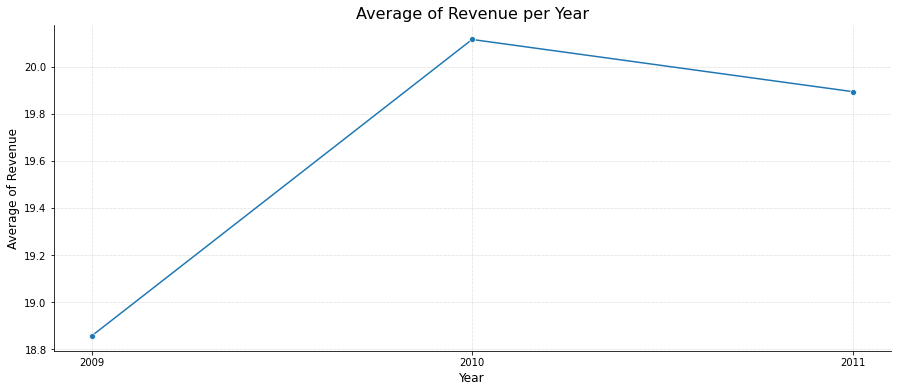

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(sales_mean['Year'], sales_mean['Revenue'], marker='o')
plt.title('Average of Revenue per Year', fontsize = 16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average of Revenue', fontsize=12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [33]:
sales_finish = sales_new[sales_new['Customer ID'].notna()]

In [34]:
sales_finish.count()

Invoice        767439
StockCode      767439
Quantity       767439
InvoiceDate    767439
Price          767439
Customer ID    767439
Country        767439
Year           767439
Revenue        767439
dtype: int64

In [41]:
purchase_cancelled = data[data['Invoice'].str.contains('C')]

In [42]:
purchase_cancelled.count()

Invoice        18872
StockCode      18872
Quantity       18872
InvoiceDate    18872
Price          18872
Customer ID    18160
Country        18872
Year           18872
dtype: int64

In [40]:
count_finished = sales_finish.groupby('Year').count()['Invoice'].reset_index()
count_finished

,Year,Invoice
0,2009,30279
1,2010,382156
2,2011,355004


In [43]:
count_cancelled = purchase_cancelled.groupby('Year').count()['Invoice'].reset_index()
count_cancelled

,Year,Invoice
0,2009,1013
1,2010,9559
2,2011,8300


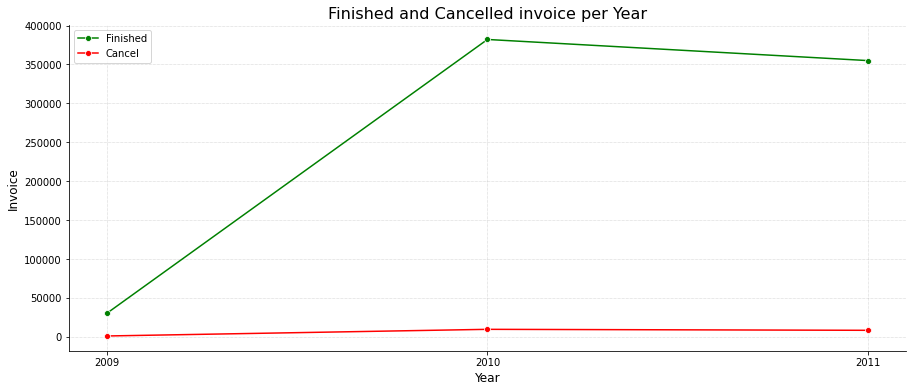

In [44]:
plt.figure(figsize=(15,6))
sns.lineplot(count_finished['Year'], count_finished['Invoice'], marker='o',
             color = 'green', label = 'Finished')
sns.lineplot(count_cancelled['Year'], count_cancelled['Invoice'], marker='o',
             color = 'red', label = 'Cancel')
plt.title('Finished and Cancelled invoice per Year', fontsize = 16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Invoice', fontsize=12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.legend()
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [51]:
cancellation_rate = count_cancelled['Invoice'] / data['Invoice'].count() * 100
cancellation = count_cancelled.assign(Cancellation_Rate = count_cancelled['Invoice'] / data['Invoice'].count() * 100)
cancellation[['Year','Cancellation_Rate']]

,Year,Cancellation_Rate
0,2009,0.099860
1,2010,0.942307
2,2011,0.818198


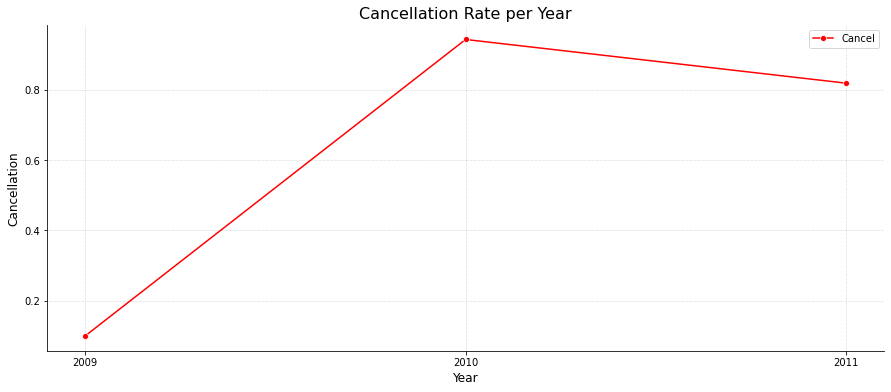

In [52]:
plt.figure(figsize=(15,6))
sns.lineplot(cancellation['Year'], cancellation['Cancellation_Rate'], marker='o',
             color = 'red', label = 'Cancel')
plt.title('Cancellation Rate per Year', fontsize = 16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cancellation', fontsize=12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.legend()
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [56]:
comparison = cancellation
comparison['Total_Finished'] = count_finished['Invoice']
comparison['Total_Cancelled'] = comparison['Invoice']
comparison[['Year','Total_Finished', 'Total_Cancelled', 'Cancellation_Rate']]

,Year,Total_Finished,Total_Cancelled,Cancellation_Rate
0,2009,30279,1013,0.099860
1,2010,382156,9559,0.942307
2,2011,355004,8300,0.818198
